# Say Realz Assignment Model 1 ~ Ridge Regression Model

Done by: Zhen Xuan, Shavonne, Kevin

Dataset from UCI Machine Learning Repository: **"Bike Sharing Dataset Data Set"**

Compilation of Dataset: *Hadi Fanaee-T*  

Source: https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset (requires Login)


# Problem Statement:

The problem statement for this dataset is to predict the total number of bikes rented based on the available information. Our goal is to predict the number of bikes rented per hour based on weather and time-related features, to help bike-sharing companies improve bike availability and optimize pricing strategies.
 
This would be a regression problem, and the learning outcome would be to build a model that can accurately predict the number of bikes rented on a given day, which can help bike-sharing companies optimize their inventory and resources.

---

### Essential Libraries

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [1]:
%matplotlib inline
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

---

## Import the Dataset

Importing Dataset for Bike Sharing from "new_hour.csv"

In [2]:
bike_data_hour = pd.read_csv('new_hour.csv')
bike_data_hour.head()

,temp,humidity,is_peak_hour,season_Spring,year_2011,year_2012,hour_1,hour_2,hour_3,hour_4,hour_5,hour_17,hour_18,total_count
0,0.24,0.81,1,1,1,0,0,0,0,0,0,0,0,4.361876
1,0.22,0.80,1,1,1,0,1,0,0,0,0,0,0,6.827897
2,0.22,0.80,1,1,1,0,0,1,0,0,0,0,0,6.162337
3,0.24,0.75,1,1,1,0,0,0,1,0,0,0,0,3.892645
4,0.24,0.75,1,1,1,0,0,0,0,1,0,0,0,0.000000


## Notebook Outline
1.1. Reason for Choosing Ridge Regression

1.2. Introduction to Ridge Regression

1.3. Training of Ridge Regression

1.4. Hyperparameters

## 1.1. Reason for Choosing Ridge Regression

Ridge Regression allows us to do demand forecasting, which is a key component to addressing our problem statement. It is a powerful technique generally used for creating parsimonious models in the presence of a ‘large’ number of features. 


## 1.2. Introduction to Ridge Regression

Ridge Regression is a model tuning method that includes L2 regularisation, meant to analyse data that experiences multicollinearity. When multicollinearity occurs, least-squares are unbiased and variances are large, resulting in predicted values being far away from actual values. 

To combat this, ridge regression is an extension to linear regression that invokes adding penalties to the loss function during training, and encourages simpler models that have smaller coefficient values. 

By being a type of regularised and penalised linear regression, the model shrinks the coefficients for input variables that do not contribute much to the prediction task. 
                           
Ridge regression optimises the following:\
Optimisation Objective = $RSS + \alpha \sum_{i=1}^{n} \beta_i^2$ <br>
where α (alpha) is the parameter that balances the amount of emphasis given to minimising RSS and minimising the sum of squares of coefficients, by impacting the magnitude of coefficients. 

α can take on certain values:
α = 0, where the objective becomes the same as simple linear regression and you will get the same coefficients as simple linear regression. <br>
α = ∞, where the coefficients will be 0, because of infinite weightage on the square of coefficients, and hence anything less than zero will make the objective infinite. <br>
0 < α < ∞, where the magnitude of α will decide the weightage given to different parts of the objective and the coefficients will be somewhere between 0 and ones for simple linear regression.

The minimization objective = $LS\ Obj + \alpha \sum_{i=1}^{n} \beta_i^2$ <br> where LS Obj is the Least Square Objective, which is the linear regression objective without regularisation.

The inputs of our Ridge Regression Model are the predictor variables that we identified previously through dummy coding. <br>
The output of our Ridge Regression Model is a scaled version of our response variable `total_count`. <br>


## 1.3 Training of Ridge Regression

Here, we import the relevant libraries for Ridge Regression Model. 

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import mean_squared_error,r2_score, mean_squared_log_error, mean_absolute_error
import statsmodels.formula.api as smf
#from statsmodels.stats.outliers_influence import variance_inflation_factor
from yellowbrick.regressor import PredictionError, ResidualsPlot
import pickle

We then isolate the column of `total_count` from the rest of the dataset.

In [4]:
X = bike_data_hour.drop(['total_count'], axis=1)
y = bike_data_hour['total_count']


We then split our dataset into training and test sets, in the ratio 70-30. It is important to divide the data into the training set and the testing set to prevent overfitting, and we chose this ratio because empirical studies show that the best results are obtained if we use 20-30% of the data for testing, and the remaining 70-80% of the data for training.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# X_Train -> Other Variables
# y_Train -> Total Count

In [6]:
# Print the shape of train and test datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train: (12165, 13)
Shape of X_test:  (5214, 13)
Shape of y_train:  (12165,)
Shape of y_test:  (5214,)


In [7]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)


Ridge()

In [8]:
# Coefficients of the Ridge Regression line
print('Coefficients \t: a = ', ridge_model.coef_)
print('Intercept \t: b = ', ridge_model.intercept_)

Coefficients 	: a =  [ 6.32381526 -4.52132861 -3.80466746 -1.77841993 -1.01542324  1.01542324
 -4.95485385 -6.20236552 -7.35509364 -8.00823153 -5.63558503  2.85819428
  2.37205512]
Intercept 	: b =  14.961325220440095


### Model 1.1

This is our baseline Ridge Regression Model, which we run with the base deafult parameters with no hypertuning.

In [9]:
y_train_pred = ridge_model.predict(X_train)

r2 = ridge_model.score(X_train, y_train)
mse = mean_squared_error(y_train, y_train_pred)

#Goodness Fit for Train Dataset
print("Explained Variance (R^2) - Train Set \t\t:", r2)
print("Mean Squared Error (MSE) - Train Set \t\t:", mse)
rmse = np.sqrt(mse)
print('Root Mean Squared Error(RMSE) - Train Set\t:', rmse)

# rmsle = np.sqrt(mean_squared_log_error(y_train, y_train_pred))
# print('Root Mean Squared Log Error(RMSLE):', rmsle)

Explained Variance (R^2) - Train Set 		: 0.7813992148805515
Mean Squared Error (MSE) - Train Set 		: 6.332670597975398
Root Mean Squared Error(RMSE) - Train Set	: 2.516479802814916


In [10]:
y_test_pred = ridge_model.predict(X_test)

r2 = ridge_model.score(X_test, y_test)
mse = mean_squared_error(y_test, y_test_pred)

#Goodness Fit for Train Dataset
print("Explained Variance (R^2) - Test Set \t\t:", r2)
print("Mean Squared Error (MSE) - Test Set \t\t:", mse)
rmse = np.sqrt(mse)
print('Root Mean Squared Error(RMSE) - Test Set\t:', rmse)

# rmsle = np.sqrt(mean_squared_log_error(y_train, y_train_pred))
# print('Root Mean Squared Log Error(RMSLE):', rmsle)

Explained Variance (R^2) - Test Set 		: 0.7782777124594868
Mean Squared Error (MSE) - Test Set 		: 6.293565099614286
Root Mean Squared Error(RMSE) - Test Set	: 2.508697889267316


c:\Users\Kevin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


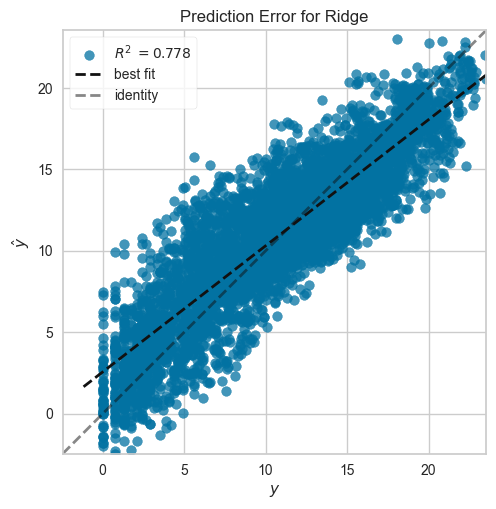

<AxesSubplot: title={'center': 'Prediction Error for Ridge'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [11]:
visualizer = PredictionError(ridge_model)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.poof()

c:\Users\Kevin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


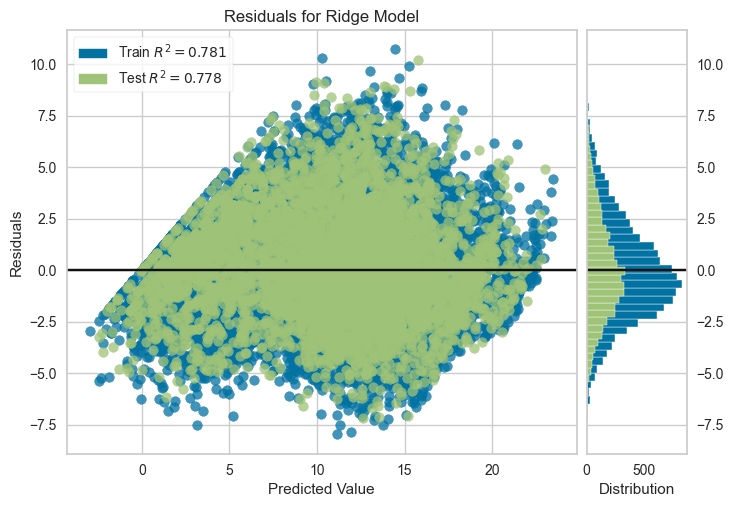

<AxesSubplot: title={'center': 'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [12]:
visualizer = ResidualsPlot(ridge_model)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.poof()

The below plotted graph is the scaled version of the predicted values against the scaled version of the original test values. 

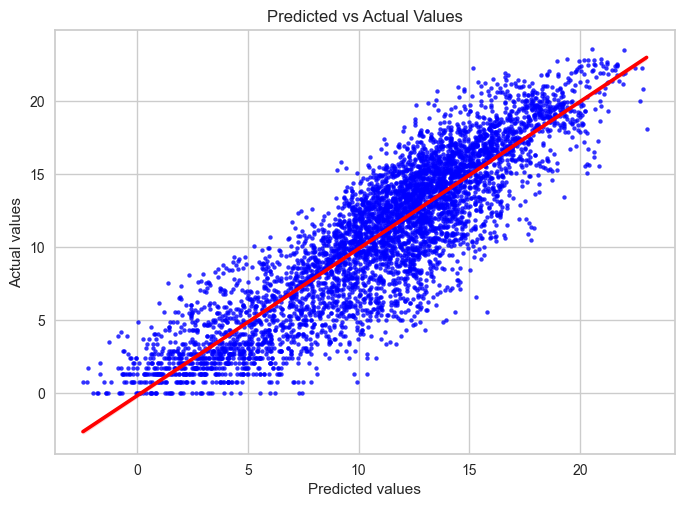

In [13]:
# Create scatter plot of predicted vs actual values
#plt.scatter(inv_test_predictions, inv_y_test)
sb.regplot(y=y_test, x=y_test_pred,scatter_kws={"color": "blue","s":10}, line_kws={"color": "red"})
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.title("Predicted vs Actual Values")
plt.show()

On top part is before we revert the values

Below part is we reverted the values

In [14]:
hour_data = pd.read_csv("hour.csv")

In [15]:
import scipy.stats as stats
from scipy.special import inv_boxcox

# perform box-cox transformation on total_count variable
bc_trans, bc_lambda = stats.boxcox(hour_data['cnt'])

# print the lambda value
print(bc_lambda)

# replace the total_count variable with the box-cox transformed values
# bike_data_hour['total_count'] = bc_trans

# invert the box-cox transformation to get back to the original scale
predicted_scale_normal = inv_boxcox(y_test_pred, bc_lambda)
original_scale_normal = inv_boxcox(y_test, bc_lambda)


# print the original scale values
print("Predicted Values (Back to Original Scale):\n", predicted_scale_normal)
print("Original Values (Back to Original Scale):\n", original_scale_normal)

0.305430867537719
Predicted Values (Back to Original Scale):
 [332.21661074  99.20150587   8.31566796 ... 576.29947153 168.03448701
 133.45473698]
Original Values (Back to Original Scale):
 12830    425.0
8688      88.0
7091       4.0
12230    526.0
431       13.0
         ...  
12749    167.0
11476    214.0
12847    556.0
16721    312.0
9511      72.0
Name: total_count, Length: 5214, dtype: float64


In [16]:
mse = mean_squared_error(original_scale_normal, predicted_scale_normal)

# Accuracy of Predicted vs Actual
print("Mean Squared Error (MSE) - Predicted vs Actual (Back to Scale) \t\t:", mse)
rmse = np.sqrt(mse)
print('Root Mean Squared Error(RMSE) - Predicted vs Actual (Back to Scale) \t:', rmse)

# rmsle = np.sqrt(mean_squared_log_error(y_train, y_train_pred))
# print('Root Mean Squared Log Error(RMSLE):', rmsle)

Mean Squared Error (MSE) - Predicted vs Actual (Back to Scale) 		: 8506.045939949512
Root Mean Squared Error(RMSE) - Predicted vs Actual (Back to Scale) 	: 92.22822745748458


Here, the below graph is the reverted scale of the predicted values against the original test values.

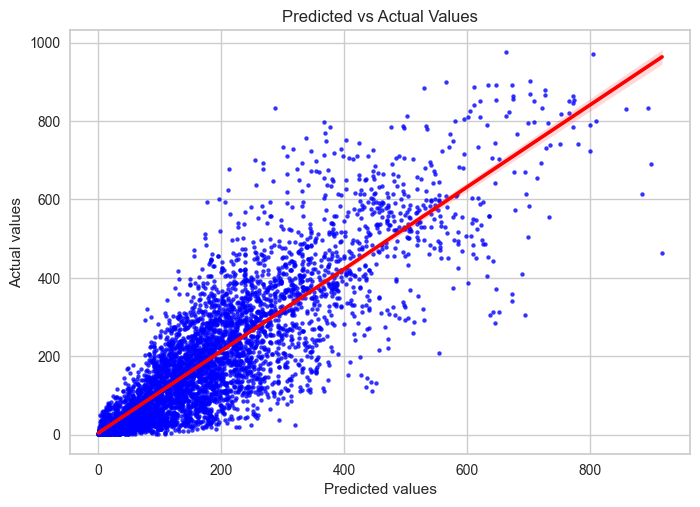

In [17]:
# Create scatter plot of predicted vs actual values
#plt.scatter(inv_test_predictions, inv_y_test)
sb.regplot(y=original_scale_normal, x=predicted_scale_normal,scatter_kws={"color": "blue","s":10}, line_kws={"color": "red"})
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.title("Predicted vs Actual Values")
plt.show()

Based on the above two graphs of preedicted and original test values, we see that majority of data points on the scaled plot lie close to the best fit line. However, the data points on the original scale on the right plot are scattered further to the right along the same best fit line. This implies that our best fit line may not be as suitable after scaling back.

### Cross Validation for Model 1.1

We also perform the 5 fold average cross validation to ensure no overfitting of the models and that the models are accurate. We will evaluate this performance metric later on. 

In [18]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


k_folds = KFold(n_splits=5, shuffle=True, random_state=1)

ridge_scores = cross_val_score(ridge_model, X, y, cv=k_folds)

print("Ridge Score for Each Cross Validation Iteration: ",ridge_scores)
print("Average K-Fold Score: ",np.mean(ridge_scores))

Ridge Score for Each Cross Validation Iteration:  [0.78524002 0.78134924 0.78814445 0.76778761 0.77821105]
Average K-Fold Score:  0.7801464750627674


## 1.4 Hyperparameters

### 1.4.1 Alpha Tuning

We do alpha tuning by iterating the alpha value and finding the value that returns the lowest Root Mean Square Logarithmic Error (RMSLE) score, which serves as a general guideline to determine the accuracy of our model. The lower the RSMLE, the higher the accuracy of our model.


In [19]:
# Define a list of alpha values to try
alphas = [0.1, 1, 2, 3, 4, 10, 30,100,200,300,400,800,900,1000]

alpha_list = []
rmsle_list = []
r2_list = []

alpha_list.clear()
rmsle_list.clear()
r2_list.clear()

# Perform box-cox transformation on the target variable
bc_trans, bc_lambda = stats.boxcox(hour_data['cnt'])

counter = 0

for alpha in alphas:
    # Create a ridge regression model with the given alpha value
    model = Ridge(alpha=alpha)
    
    # Fit the model to the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the test data
    test_predictions = model.predict(X_test)
    #test_predictions = model.predict(X_train)
    
    # Apply inverse box-cox transformation to predicted values and actual values
    inv_test_predictions = inv_boxcox(test_predictions, bc_lambda)
    inv_y_test = inv_boxcox(y_test, bc_lambda)
    #inv_y_test = inv_boxcox(y_train, bc_lambda)

    #print("Test predicted Shape:", inv_test_predictions.shape)
    #print("Test predicted Shape:", inv_y_test.shape)

    # Calculate RMSLE and R2 score
    rmsle = np.sqrt(mean_squared_log_error(inv_y_test, inv_test_predictions))
    r2 = r2_score(inv_y_test, inv_test_predictions)
    print(f"Alpha: {alpha}, RMSLE: {rmsle}, R2 score: {r2}")

    # Append the alpha and RMSLE values to their respective lists
    alpha_list.append(alpha)
    rmsle_list.append(rmsle)
    r2_list.append(r2)


Alpha: 0.1, RMSLE: 0.6904585584578191, R2 score: 0.730837403960212
Alpha: 1, RMSLE: 0.6904350306575655, R2 score: 0.7307432871763433
Alpha: 2, RMSLE: 0.6904184280163753, R2 score: 0.7306373400767276
Alpha: 3, RMSLE: 0.6904117149806842, R2 score: 0.7305299665304381
Alpha: 4, RMSLE: 0.6904147364095151, R2 score: 0.7304211855624854
Alpha: 10, RMSLE: 0.6906288450396838, R2 score: 0.7297399690340176
Alpha: 30, RMSLE: 0.6934463513736103, R2 score: 0.7271542432674618
Alpha: 100, RMSLE: 0.7186181364190464, R2 score: 0.7154623273161931
Alpha: 200, RMSLE: 0.767308522133077, R2 score: 0.695174362085524
Alpha: 300, RMSLE: 0.8138119835331559, R2 score: 0.6735248837844872
Alpha: 400, RMSLE: 0.8542924038155718, R2 score: 0.6518758541975924
Alpha: 800, RMSLE: 0.9675612939814021, R2 score: 0.5726982145085495
Alpha: 900, RMSLE: 0.9877582168280085, R2 score: 0.5551095010377449
Alpha: 1000, RMSLE: 1.0058315348100753, R2 score: 0.5383597728352395


In [20]:
# Create a pandas DataFrame from the alpha and RMSLE lists
results_df = pd.DataFrame({'Alpha': alpha_list, 'RMSLE': rmsle_list, 'R2':r2_list})

In [21]:
results_df

,Alpha,RMSLE,R2
0,0.1,0.690459,0.730837
1,1.0,0.690435,0.730743
2,2.0,0.690418,0.730637
3,3.0,0.690412,0.730530
4,4.0,0.690415,0.730421
5,10.0,0.690629,0.729740
6,30.0,0.693446,0.727154
7,100.0,0.718618,0.715462
8,200.0,0.767309,0.695174
9,300.0,0.813812,0.673525


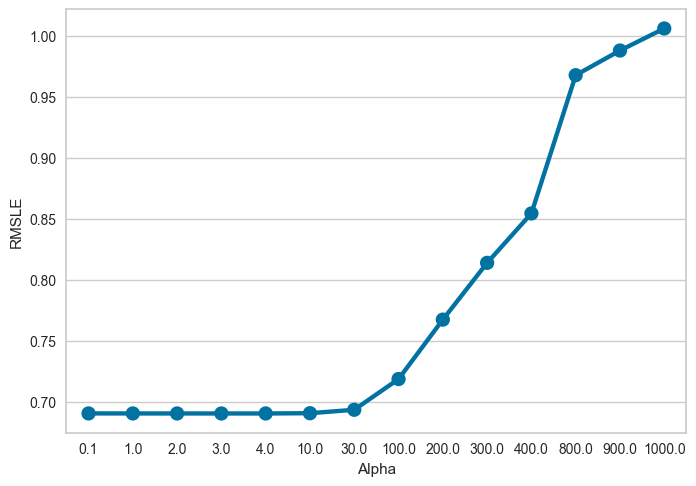

In [22]:
# Plot the RMSLE values for each alpha using seaborn's pointplot
sb.pointplot(x='Alpha', y='RMSLE', data=results_df,errorbar=None)
plt.show()

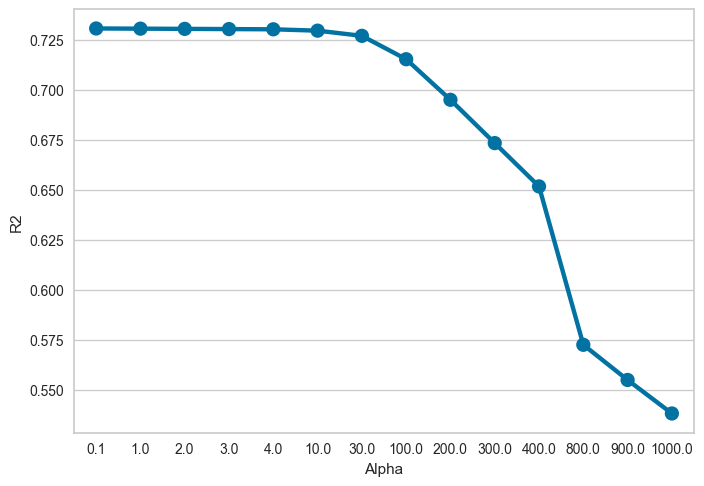

In [23]:
# Plot the RMSLE values for each alpha using seaborn's pointplot
sb.pointplot(x='Alpha', y='R2', data=results_df,errorbar=None)
plt.show()

In [24]:
min_rmsle_row = results_df.loc[results_df['RMSLE'] == results_df['RMSLE'].min(), ['Alpha', 'RMSLE','R2']]
print(min_rmsle_row)


   Alpha     RMSLE       R2
3    3.0  0.690412  0.73053


To check which variables are most significant in contributing to the R2 score and RMSLE, you can use the coef_ attribute of the trained model. For example, if you are using a Ridge regression model, you can access the coefficients using model.coef_. The coefficients represent the strength and direction of the relationship between each input variable and the output variable.

All the performance metrics will be evaluated in the later section of Evaluation and Conclusion.

### 1.4.2 Feature Importances

Here, we identify the top 10 feature importance for hypertuning.


In [25]:
# Train a Ridge regression model with alpha=0.1
model = Ridge(alpha=3)
model.fit(X_train, y_train)

# Get the coefficients for each input variable
coefs = pd.Series(model.coef_, index=X_train.columns)

# Sort the coefficients in descending order
sorted_coefs = coefs.abs().sort_values(ascending=False)

# Print the top 10 variables with the largest coefficients
print(sorted_coefs.head(10))

hour_4          7.968892
hour_3          7.315563
temp            6.298917
hour_2          6.170890
hour_5          5.606501
hour_1          4.928050
humidity        4.522937
is_peak_hour    3.812505
hour_17         2.851952
hour_18         2.366976
dtype: float64


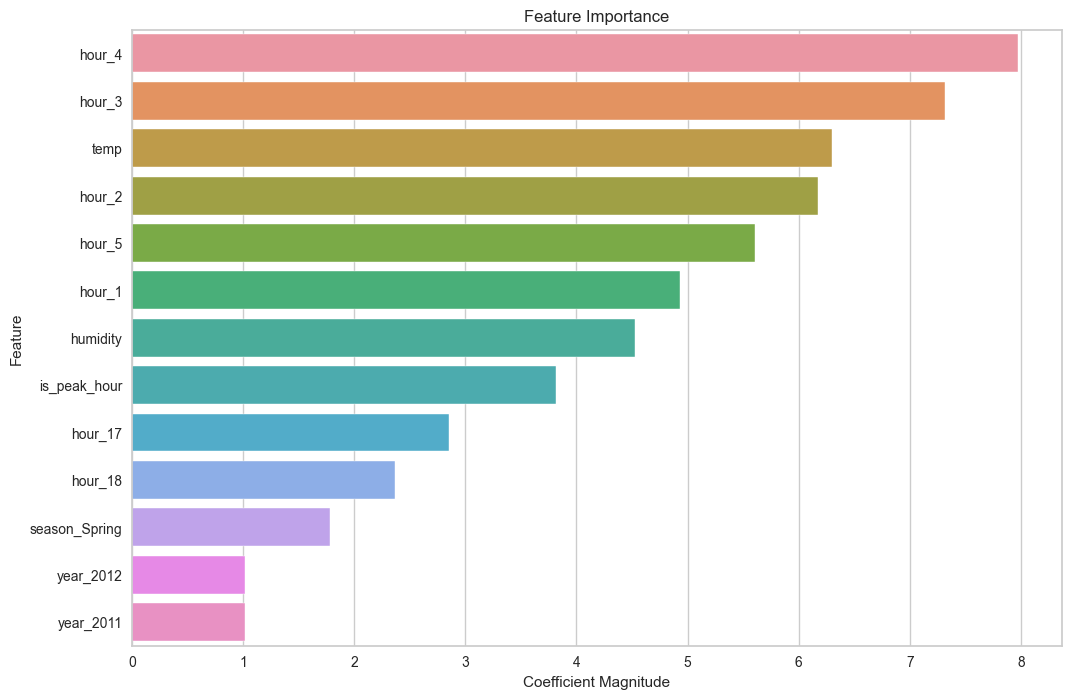

In [26]:
# Plot the coefficients as a horizontal bar plot based on Most Important Factors
plt.figure(figsize=(12, 8))
sb.barplot(x=sorted_coefs.values, y=sorted_coefs.index, orient='h')
plt.title("Feature Importance")
plt.xlabel("Coefficient Magnitude")
plt.ylabel("Feature")
plt.show()

### Model 1.2

This model uses the hypertuned parameter of alpha = 3.0.

In [27]:
ridge_model = Ridge(alpha=3.0)
ridge_model.fit(X_train, y_train)


Ridge(alpha=3.0)

In [28]:
# Coefficients of the Ridge Regression line
print('Coefficients \t: a = ', ridge_model.coef_)
print('Intercept \t: b = ', ridge_model.intercept_)

Coefficients 	: a =  [ 6.29891653 -4.52293713 -3.81250534 -1.78300562 -1.01529137  1.01529137
 -4.92804958 -6.1708899  -7.31556268 -7.96889158 -5.60650127  2.85195156
  2.36697607]
Intercept 	: b =  14.975065950004776


In [29]:
y_train_pred = ridge_model.predict(X_train)

r2 = ridge_model.score(X_train, y_train)
mse = mean_squared_error(y_train, y_train_pred)

#Goodness Fit for Train Dataset
print("Explained Variance (R^2) - Train Set \t\t:", r2)
print("Mean Squared Error (MSE) - Train Set \t\t:", mse)
rmse = np.sqrt(mse)
print('Root Mean Squared Error(RMSE) - Train Set\t:', rmse)

# rmsle = np.sqrt(mean_squared_log_error(y_train, y_train_pred))
# print('Root Mean Squared Log Error(RMSLE):', rmsle)

Explained Variance (R^2) - Train Set 		: 0.7813851939698466
Mean Squared Error (MSE) - Train Set 		: 6.333076771306062
Root Mean Squared Error(RMSE) - Train Set	: 2.516560504201332


In [30]:
y_test_pred = ridge_model.predict(X_test)

r2 = ridge_model.score(X_test, y_test)
mse = mean_squared_error(y_test, y_test_pred)

#Goodness Fit for Train Dataset
print("Explained Variance (R^2) - Test Set \t\t:", r2)
print("Mean Squared Error (MSE) - Test Set \t\t:", mse)
rmse = np.sqrt(mse)
print('Root Mean Squared Error(RMSE) - Test Set\t:', rmse)

# rmsle = np.sqrt(mean_squared_log_error(y_train, y_train_pred))
# print('Root Mean Squared Log Error(RMSLE):', rmsle)

Explained Variance (R^2) - Test Set 		: 0.7782270579315086
Mean Squared Error (MSE) - Test Set 		: 6.2950029233574805
Root Mean Squared Error(RMSE) - Test Set	: 2.5089844406367847


c:\Users\Kevin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


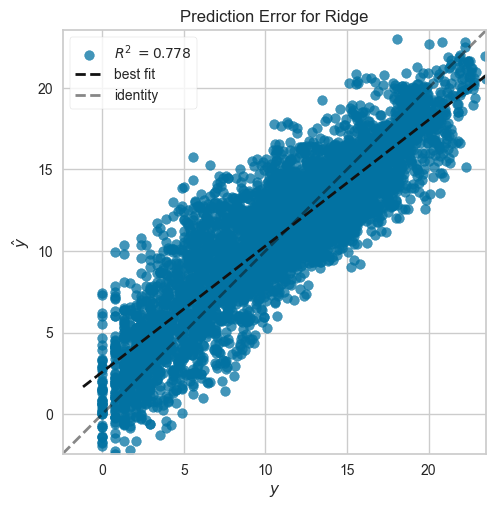

<AxesSubplot: title={'center': 'Prediction Error for Ridge'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [31]:
visualizer = PredictionError(ridge_model)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.poof()

c:\Users\Kevin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


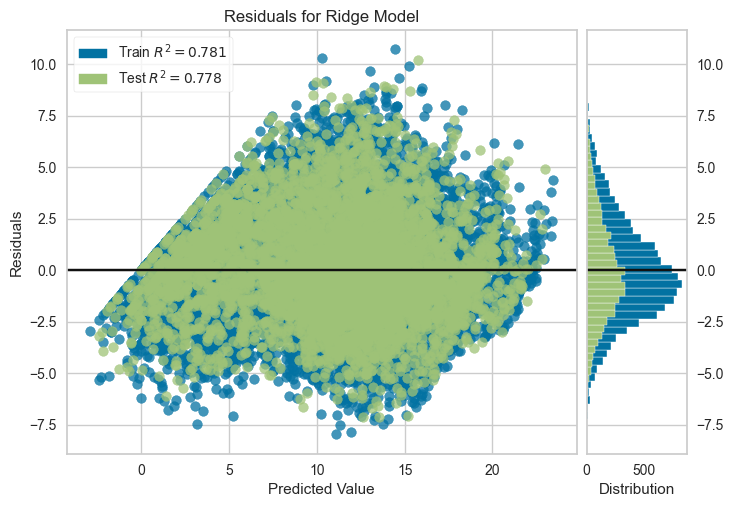

<AxesSubplot: title={'center': 'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [32]:
visualizer = ResidualsPlot(ridge_model)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.poof()

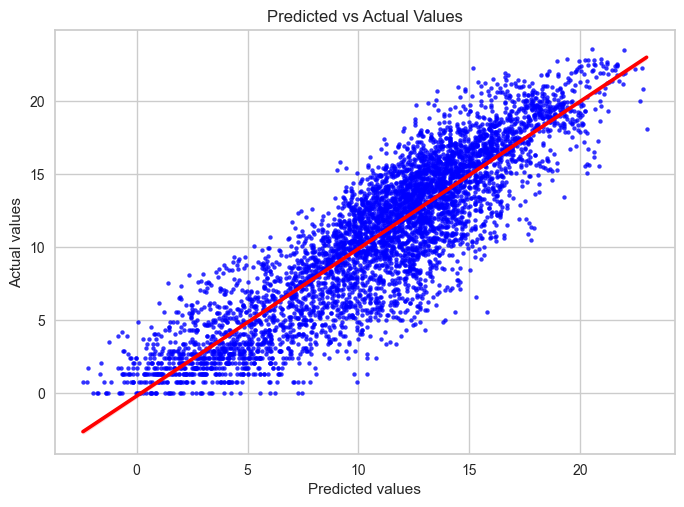

In [33]:
# Create scatter plot of predicted vs actual values
#plt.scatter(inv_test_predictions, inv_y_test)
sb.regplot(y=y_test, x=y_test_pred,scatter_kws={"color": "blue","s":10}, line_kws={"color": "red"})
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.title("Predicted vs Actual Values")
plt.show()

In [34]:
import scipy.stats as stats
from scipy.special import inv_boxcox

# perform box-cox transformation on total_count variable
bc_trans, bc_lambda = stats.boxcox(hour_data['cnt'])

# print the lambda value
print(bc_lambda)

# replace the total_count variable with the box-cox transformed values
# bike_data_hour['total_count'] = bc_trans

# invert the box-cox transformation to get back to the original scale
predicted_scale_normal = inv_boxcox(y_test_pred, bc_lambda)
original_scale_normal = inv_boxcox(y_test, bc_lambda)


# print the original scale values
print("Predicted Values (Back to Original Scale):\n", predicted_scale_normal)
print("Original Values (Back to Original Scale):\n", original_scale_normal)

0.305430867537719
Predicted Values (Back to Original Scale):
 [331.39483307  99.06879485   8.44033084 ... 575.73397669 167.74412073
 133.56421485]
Original Values (Back to Original Scale):
 12830    425.0
8688      88.0
7091       4.0
12230    526.0
431       13.0
         ...  
12749    167.0
11476    214.0
12847    556.0
16721    312.0
9511      72.0
Name: total_count, Length: 5214, dtype: float64


In [35]:
mse = mean_squared_error(original_scale_normal, predicted_scale_normal)

# Accuracy of Predicted vs Actual
print("Mean Squared Error (MSE) - Predicted vs Actual (Back to Scale) \t\t:", mse)
rmse = np.sqrt(mse)
print('Root Mean Squared Error(RMSE) - Predicted vs Actual (Back to Scale) \t:', rmse)

# rmsle = np.sqrt(mean_squared_log_error(y_train, y_train_pred))
# print('Root Mean Squared Log Error(RMSLE):', rmsle)

Mean Squared Error (MSE) - Predicted vs Actual (Back to Scale) 		: 8512.784918506375
Root Mean Squared Error(RMSE) - Predicted vs Actual (Back to Scale) 	: 92.2647544759448


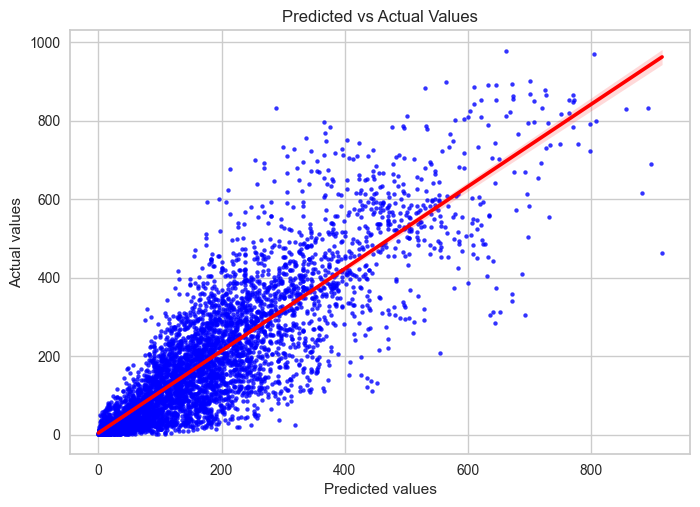

In [36]:
# Create scatter plot of predicted vs actual values
#plt.scatter(inv_test_predictions, inv_y_test)
sb.regplot(y=original_scale_normal, x=predicted_scale_normal,scatter_kws={"color": "blue","s":10}, line_kws={"color": "red"})
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.title("Predicted vs Actual Values")
plt.show()

### Cross Validation for Model 1.2

To show that it is not over-fitted and our model is accurate throughtout

In [37]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


k_folds = KFold(n_splits=5, shuffle=True, random_state=1)

ridge_scores = cross_val_score(ridge_model, X, y, cv=k_folds)

print("Ridge Score for Each Cross Validation Iteration: ",ridge_scores)
print("Average K-Fold Score: ",np.mean(ridge_scores))

Ridge Score for Each Cross Validation Iteration:  [0.7851982  0.7813443  0.78814315 0.7677753  0.77822352]
Average K-Fold Score:  0.7801368938833387


### Model 1.3

We now use only the identified top 10 importance of features to train the Ridge Regression Model. 

In [38]:
X_train.drop(['year_2011', 'year_2012', 'season_Spring'], axis=1, inplace=True)
X_test.drop(['year_2011', 'year_2012', 'season_Spring'], axis=1, inplace=True)


In [39]:
ridge_model = Ridge(alpha=3.0)
ridge_model.fit(X_train, y_train)


Ridge(alpha=3.0)

In [40]:
# Coefficients of the Ridge Regression line
print('Coefficients \t: a = ', ridge_model.coef_)
print('Intercept \t: b = ', ridge_model.intercept_)

Coefficients 	: a =  [ 8.86747063 -4.37071864 -3.84509893 -4.85587992 -6.02940634 -7.10470702
 -7.79329843 -5.44830205  2.72791753  2.25963989]
Intercept 	: b =  13.176419374287923


In [41]:
y_train_pred = ridge_model.predict(X_train)

r2 = ridge_model.score(X_train, y_train)
mse = mean_squared_error(y_train, y_train_pred)

#Goodness Fit for Train Dataset
print("Explained Variance (R^2) - Train Set \t\t:", r2)
print("Mean Squared Error (MSE) - Train Set \t\t:", mse)
rmse = np.sqrt(mse)
print('Root Mean Squared Error(RMSE) - Train Set\t:', rmse)

# rmsle = np.sqrt(mean_squared_log_error(y_train, y_train_pred))
# print('Root Mean Squared Log Error(RMSLE):', rmsle)

Explained Variance (R^2) - Train Set 		: 0.7344925879107145
Mean Squared Error (MSE) - Train Set 		: 7.691513921890155
Root Mean Squared Error(RMSE) - Train Set	: 2.7733578784372845


In [42]:
y_test_pred = ridge_model.predict(X_test)

r2 = ridge_model.score(X_test, y_test)
mse = mean_squared_error(y_test, y_test_pred)

#Goodness Fit for Train Dataset
print("Explained Variance (R^2) - Test Set \t\t:", r2)
print("Mean Squared Error (MSE) - Test Set \t\t:", mse)
rmse = np.sqrt(mse)
print('Root Mean Squared Error(RMSE) - Test Set\t:', rmse)

# rmsle = np.sqrt(mean_squared_log_error(y_train, y_train_pred))
# print('Root Mean Squared Log Error(RMSLE):', rmsle)

Explained Variance (R^2) - Test Set 		: 0.7377582516476333
Mean Squared Error (MSE) - Test Set 		: 7.443705968398502
Root Mean Squared Error(RMSE) - Test Set	: 2.728315591788916
